In [26]:
%matplotlib inline

# data manipulation and modeling
import numpy as np
import pandas as pd
import statsmodels.api as sm

# graphix
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as tsaplots

# utility
import os

# notebook parameters
pd.set_option('display.max_columns', 40) # number of columns in training set
plt.rcParams['figure.figsize'] = (10.0, 10.0)


In [134]:
df= pd.read_excel("~/HIV_Hack/India_Data_HIV_Hack.xlsx", index_col=0)
df.describe()

,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,2018
count,5.950000e+02,5.950000e+02,5.890000e+02,6.150000e+02,6.100000e+02,6.210000e+02,6.210000e+02,6.000000e+02,6.230000e+02,6.410000e+02,6.300000e+02,6.340000e+02,6.260000e+02,6.210000e+02,6.270000e+02,6.680000e+02,6.800000e+02,6.730000e+02,0.0
mean,1.325110e+11,1.385940e+11,1.426697e+11,1.484225e+11,1.530227e+11,1.636486e+11,1.733627e+11,1.745484e+11,1.829100e+11,1.912976e+11,2.036180e+11,2.221529e+11,2.349511e+11,2.532793e+11,2.680514e+11,2.665554e+11,2.919183e+11,3.183917e+11,NaN
std,7.825368e+11,8.074250e+11,8.137708e+11,8.674566e+11,8.810835e+11,9.441026e+11,9.944706e+11,9.650788e+11,1.019707e+12,1.066076e+12,1.110177e+12,1.203050e+12,1.248972e+12,1.324565e+12,1.389571e+12,1.404250e+12,1.527318e+12,1.632942e+12,NaN
min,-2.869381e+11,-2.436799e+11,-3.036266e+11,-1.089382e+11,-2.476306e+11,-2.559701e+11,-4.241583e+11,-6.844814e+11,-6.627296e+11,-6.979578e+11,-6.153377e+11,-3.688427e+11,-6.278061e+11,-5.927621e+11,-4.851596e+11,-5.286259e+11,-3.140618e+11,-2.774912e+11,NaN
25%,6.459873e+00,7.027677e+00,8.629100e+00,8.648168e+00,7.168985e+00,8.543401e+00,7.000000e+00,6.970777e+00,8.993554e+00,9.048392e+00,8.812755e+00,1.072377e+01,1.024571e+01,9.199465e+00,9.897849e+00,1.051065e+01,1.099959e+01,8.839417e+00,NaN
50%,1.083000e+03,1.151475e+03,5.043000e+03,1.000000e+04,6.535981e+02,2.482559e+03,2.861512e+02,1.044700e+04,1.004100e+04,1.834000e+03,1.209350e+04,1.275400e+04,3.500000e+04,1.418900e+04,1.461120e+04,4.463120e+02,3.668606e+02,1.157000e+03,NaN
75%,4.447054e+08,4.578710e+08,6.148070e+08,7.753445e+08,6.409788e+08,5.202430e+08,5.883460e+08,7.271540e+08,9.130815e+08,9.551780e+08,1.369582e+09,1.402921e+09,1.685536e+09,1.954536e+09,2.221260e+09,1.869321e+09,2.145310e+09,2.201691e+09,NaN
max,6.609969e+12,6.807064e+12,6.807928e+12,7.430848e+12,7.554431e+12,8.102487e+12,8.565344e+12,8.126398e+12,8.697766e+12,9.287298e+12,9.594649e+12,1.045342e+13,1.066943e+13,1.137409e+13,1.201999e+13,1.238076e+13,1.358468e+13,1.430156e+13,NaN


In [3]:
df.head(5)

,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Country Name,Series Name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39.9893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,(%) Program participation - All Social Protection
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,28.4034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,(%) Program participation - All Social Safety ...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.99549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,(%) Program participation - Unemp benefits and...
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,14.6685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,"2005 PPP conversion factor, GDP (LCU per inter..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,15.6015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,"2005 PPP conversion factor, private consumptio..."


In [4]:
df.loc[1372]

1972                                                          NaN
1973                                                          NaN
1974                                                          NaN
1975                                                          NaN
1976                                                          NaN
1977                                                          NaN
1978                                                          NaN
1979                                                          NaN
1980                                                          NaN
1981                                                          NaN
1982                                                          NaN
1983                                                          NaN
1984                                                          NaN
1985                                                          NaN
1986                                                          NaN
1987      

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1569 entries, 0 to 1568
Data columns (total 49 columns):
1972            595 non-null float64
1973            595 non-null float64
1974            589 non-null float64
1975            615 non-null float64
1976            610 non-null float64
1977            621 non-null float64
1978            621 non-null float64
1979            600 non-null float64
1980            623 non-null float64
1981            641 non-null float64
1982            630 non-null float64
1983            634 non-null float64
1984            626 non-null float64
1985            621 non-null float64
1986            627 non-null float64
1987            668 non-null float64
1988            680 non-null float64
1989            673 non-null float64
1990            1017 non-null object
1991            971 non-null object
1992            987 non-null object
1993            965 non-null object
1994            1024 non-null object
1995            1042 non-null object
1996    

In [6]:
df.index.values

array([   0,    1,    2, ..., 1566, 1567, 1568], dtype=int64)

In [7]:
df.tail()

,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Country Name,Series Name
1564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


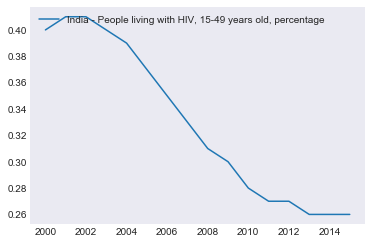

In [8]:
plt.style.use('seaborn-dark')
X=df.iloc[1371][28:44]
country, descrip = df[["Country Name", "Series Name"]].iloc[1371]
plt.plot(X,label="{} - {}".format(country, descrip))
plt.legend(loc='upper left')
plt.ticklabel_format(style='plain')

2225930
2146839


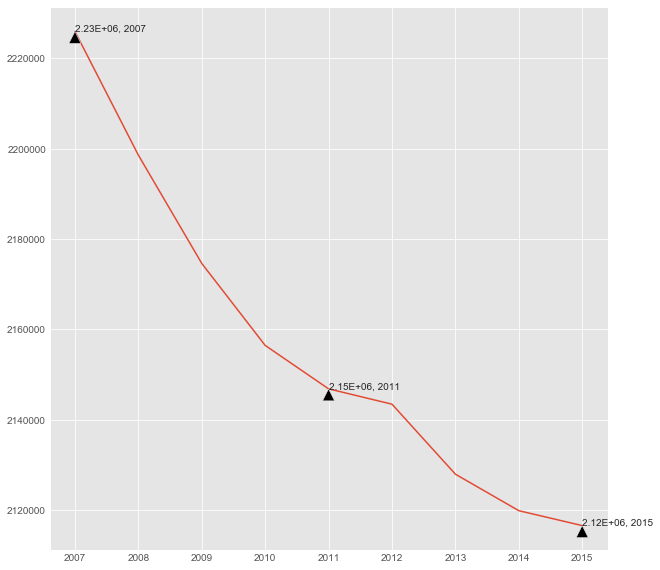

In [17]:
year= np.array([2007, 2008 ,2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])
year[:10]
i=1498
X=df.iloc[i][35:46]
X_max = X.max()
yr_max = year[X.values.argmax()]
X_median = int(X.median())
yr_median = np.take(year, 4)
X_min = X.min()
yr_min = year[X.values.argmin()]
plt.annotate(('%.2E, %d' %(X_max,yr_max)),xy=(yr_max,X_max),arrowprops=dict(facecolor='black'))
plt.annotate(('%.2E, %d' %(X_median,yr_median)),xy=(yr_median,X_median),arrowprops=dict(facecolor='black'))
plt.annotate(('%.2E, %d' %(X_min,yr_min)),xy=(yr_min,X_min),arrowprops=dict(facecolor='black'))

plt.plot(year,X)
print(X_max)
print(X_median)


In [10]:
plt.style.use('seaborn-dark')
i=1504

X=df.iloc[i][28:44]
yr_max = X.argmax
cs_max = X.max()
country, descrip = df[["Country Name", "Series Name"]].iloc[i]
plt.plot(X,label="{} - {}".format(country, descrip))
plt.legend(loc='upper left')
plt.ticklabel_format(style='plain')
plt.annotate('Maximum',xy=(yr_max,cs_max),arrowprops=dict(facecolor='black'))

TypeError: must be real number, not method

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000015C1C523510> (for post_execute):


TypeError: float() argument must be a string or a number, not 'method'

TypeError: float() argument must be a string or a number, not 'method'

<Figure size 432x288 with 1 Axes>

In [11]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


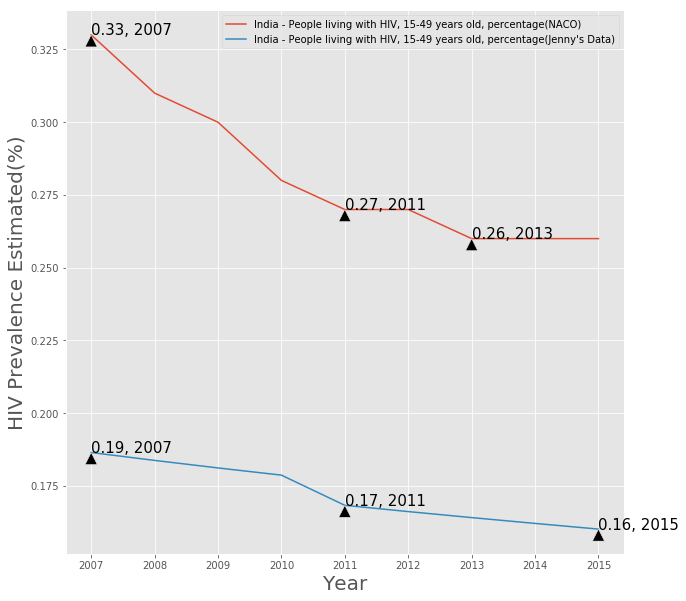

In [109]:
from bokeh.plotting import figure 
from bokeh.io import output_file,show
plt.style.use('ggplot')
def drange(start, stop, step):
    r = start
    while r < stop:
        yield r
        r += step
year= np.array([2007, 2008 ,2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])
for i in range(1372,1374):
    X=df.iloc[i][35:44]
    country, descrip = df[["Country Name", "Series Name"]].iloc[i]
    X_max = X.max()
    yr_max = year[X.values.argmax()]
    X_median = X.values[int(len(X)/2)]
    yr_median = np.take(year, 4)
    X_min = X.min()
    yr_min = year[X.values.argmin()]
    plt.annotate(('%.2f, %d' %(X_max,yr_max)),xy=(yr_max,X_max),arrowprops=dict(facecolor='black'),size=15)
    plt.annotate(('%.2f, %d' %(X_median,yr_median)),xy=(yr_median,X_median),arrowprops=dict(facecolor='black'),size=15)
    plt.annotate(('%.2f, %d' %(X_min,yr_min)),xy=(yr_min,X_min),arrowprops=dict(facecolor='black'),size=15)
    plt.plot(X,label="{} - {}".format(country, descrip))
    plt.legend(loc='best')
    plt.ticklabel_format(style='plain',size=50)
    plt.xlabel('Year',size=20)
    plt.ylabel('HIV Prevalence Estimated(%)',size=20)


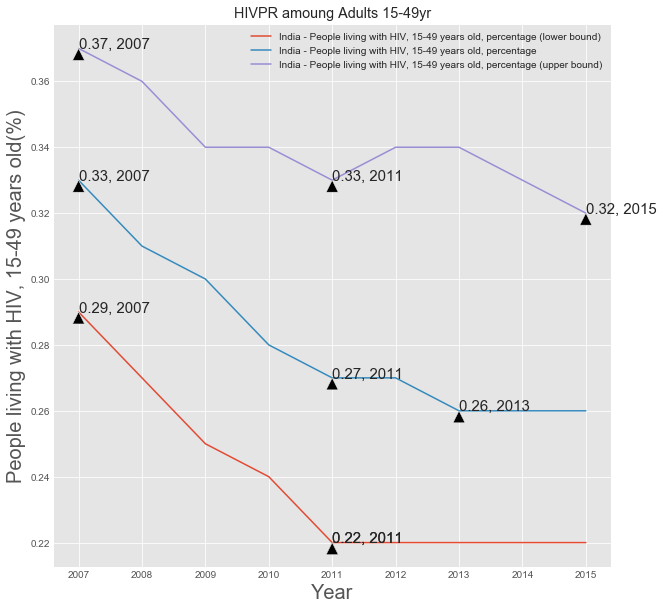

In [152]:
from bokeh.plotting import figure 
from bokeh.io import output_file,show
plt.style.use('ggplot')
def drange(start, stop, step):
    r = start
    while r < stop:
        yield r
        r += step
                
#'{:0.2f}, kg={:0.2f}, lb={:0.2f}, gal={:0.2f}'.format(var1, var2, var3, var4)
year= np.array([2007, 2008 ,2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,2018])
for i in range(1370,1373):
    X=df.iloc[i][35:44]
    country, descrip = df[["Country Name", "Series Name"]].iloc[i]
    X_max = X.max()
    yr_max = year[X.values.argmax()]
    X_median = X.values[int(len(X)/2)]
    yr_median = np.take(year, 4)
    X_min = X.min()
    yr_min = year[X.values.argmin()]
    plt.annotate(('%.2f, %d' %(X_max,yr_max)),xy=(yr_max,X_max), arrowprops=dict(facecolor='black'),size=15)
    plt.annotate(('%.2f, %d' %(X_median,yr_median)),xy=(yr_median,X_median),arrowprops=dict(facecolor='black'),size=15)
    plt.annotate(('%.2f, %d' %(X_min,yr_min)),xy=(yr_min,X_min),arrowprops=dict(facecolor='black'),size=15)
    plt.plot(X,label="{} - {}".format(country, descrip))
    plt.legend(loc='best')
    plt.ticklabel_format(style='plain')
    plt.xlabel('Year',size=20)
    plt.ylabel('People living with HIV, 15-49 years old(%)',size=20)
    plt.title('HIVPR amoung Adults 15-49yr')



In [19]:
from bokeh.plotting import figure 
from bokeh.io import output_file,show
plt.style.use('ggplot')
def drange(start, stop, step):
    r = start
    while r < stop:
        yield r
        r += step
for i in range(1497,1500):
    X=df.iloc[i][25:44]
    country, descrip = df[["Country Name", "Series Name"]].iloc[i]
    yr_max = year[df.iloc[i].argmax()]
    X_max = X.max()
    yr_max = year[X.values.argmax()]
    X_median = int(X.median())
    yr_median = np.take(year, 4)
    X_min = X.min()
    yr_min = year[X.values.argmin()]
    plt.annotate(('%.2E, %d' %(X_max,yr_max)),xy=(yr_max,X_max),arrowprops=dict(facecolor='black'))
    plt.annotate(('%.2E, %d' %(X_median,yr_median)),xy=(yr_median,X_median),arrowprops=dict(facecolor='black'))
    plt.annotate(('%.2E, %d' %(X_min,yr_min)),xy=(yr_min,X_min),arrowprops=dict(facecolor='black'))
    plt.plot(X,label="{} - {}".format(country, descrip))
    plt.legend(loc='best')
    plt.xlabel('Year',size=20)
    plt.ylabel('People living with HIV, 15-49 years old',size=20)
    plt.title('HIVPR amoung Adults 15-49yr')
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  if sys.path[0] == '':


TypeError: reduction operation 'argmax' not allowed for this dtype

2649302

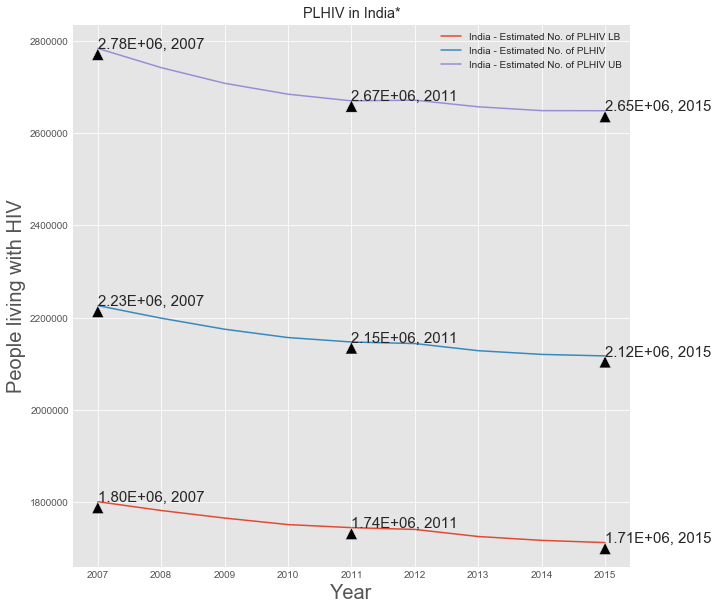

In [67]:
from bokeh.plotting import figure 
from bokeh.io import output_file,show
plt.style.use('ggplot')
def drange(start, stop, step):
    r = start
    while r < stop:
        yield r
        r += step
year= np.array([2007, 2008 ,2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])
for i in range(1497,1500):
    X=df.iloc[i][35:46]
    country, descrip = df[["Country Name", "Series Name"]].iloc[i]
    X_max = X.max()
    yr_max = year[X.values.argmax()]
    X_median = int(X.median())
    yr_median = np.take(year, 4)
    X_min = X.min()
    yr_min = year[X.values.argmin()]
    plt.annotate(('%.2E, %d' %(X_max,yr_max)),xy=(yr_max,X_max),arrowprops=dict(facecolor='black'),size=15)
    plt.annotate(('%.2E, %d' %(X_median,yr_median)),xy=(yr_median,X_median),arrowprops=dict(facecolor='black'),size=15)
    plt.annotate(('%.2E, %d' %(X_min,yr_min)),xy=(yr_min,X_min),arrowprops=dict(facecolor='black'),size=15)
    plt.plot(X,label="{} - {}".format(country, descrip))
    plt.legend(loc='best')
    plt.xlabel('Year',size=20)
    plt.ylabel('People living with HIV',size=20)
    plt.title('PLHIV in India*')
X.min()

In [117]:
import statistics

items = [1, 0.3, 0.2, 0.3, 8]

statistics.median(items)


0.3

In [99]:
X

[0.36, 0.34, 0.34, 0.33, 0.34, 0.34, 0.33, 0.32]

In [115]:
np.median(X)

0.6

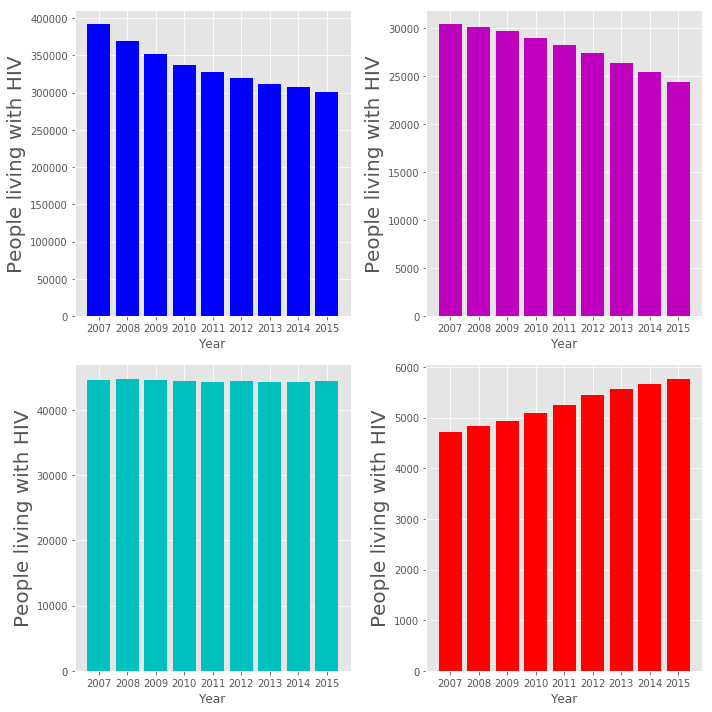

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [80]:
from bokeh.plotting import figure 
from bokeh.io import output_file,show
plt.style.use('ggplot')
def drange(start, stop, step):
    r = start
    while r < stop:
        yield r
        r += step
year= np.array([2007, 2008 ,2009, 2010, 2011, 2012, 2013, 2014, 2015])
#for i in range(1516,1518):
    
  #  plt.legend(loc='best')

 #   plt.ylabel('People living with HIV',size=20)
  #  plt.title('PLHIV in India*')

# Plot in blue the % of degrees awarded to women in the Physical Sciences
    
plt.title('PLHIV in India')
plt.subplot(2,2,1)
plt.style.use('ggplot')
X=df.iloc[1516][35:44]
plt.bar(year,X, tick_label=year,color='b')
plt.ylabel('People living with HIV',size=20)
plt.xlabel('Year')
plt.subplot(2,2,2)
X=df.iloc[1517][35:44]
plt.bar(year,X, tick_label=year,color='m')
plt.ylabel('People living with HIV',size=20)
plt.xlabel('Year')
plt.subplot(2,2,3)
X=df.iloc[1518][35:44]
plt.bar(year,X, tick_label=year,color='c')
plt.ylabel('People living with HIV',size=20)
plt.xlabel('Year')
plt.subplot(2,2,4)
X=df.iloc[1519][35:44]
plt.bar(year,X, tick_label=year,color='r')
plt.ylabel('People living with HIV',size=20)
plt.xlabel('Year')



# Improve the spacing between subplots and display them
plt.tight_layout()
plt.show()
print(plt.style.available)


In [ ]:

    plt.subplot(2,2,1)

# Plot in blue the % of degrees awarded to women in the Physical Sciences
    plt.hist(year,physical_sciences, color='blue')
    plt.title('PLHIV in India')

# Make the top right subplot active in the current 2x2 subplot grid 
plt.subplot(2,2,2)

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(year, computer_science, color='red')
plt.title('Computer Science')

# Make the bottom left subplot active in the current 2x2 subplot grid
plt.subplot(2,2,3)

# Plot in green the % of degrees awarded to women in Health Professions
plt.plot(year, health, color='green')
plt.title('Health Professions')

# Make the bottom right subplot active in the current 2x2 subplot grid

plt.subplot(2,2,4)

# Plot in yellow the % of degrees awarded to women in Education
plt.plot(year, education, color='yellow')
plt.title('Education')

# Improve the spacing between subplots and display them
plt.tight_layout()
plt.show()


In [2]:
df= pd.read_excel("C:/Users/Varun-PC/Desktop/Ubuntu_HIV.xlsx")



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 12 columns):
Site           39 non-null object
Author         33 non-null object
Year           45 non-null int64
Sample Size    39 non-null float64
NRTI           35 non-null object
NNRTI          35 non-null object
PI             33 non-null object
DR             39 non-null float64
Category       39 non-null object
Latitude       39 non-null float64
Longitude      39 non-null float64
Location       39 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 4.3+ KB


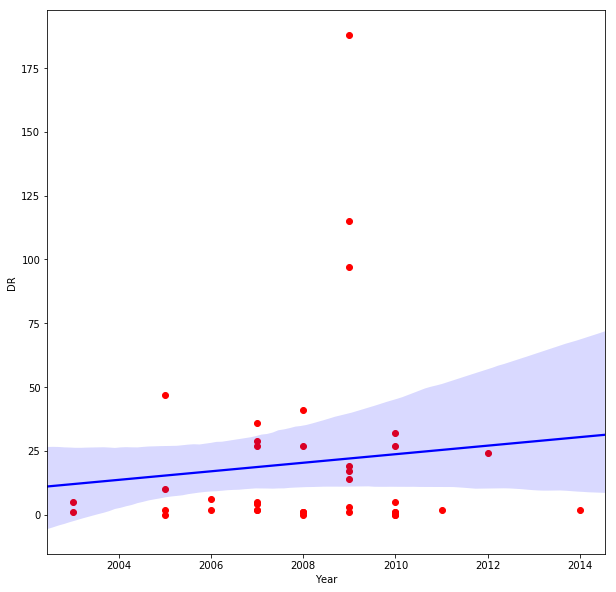

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a linear regression between 'weight' and 'hp'
plt.scatter(df['Year'], df['DR'], label='df', color='red', marker='o')
#sns.lmplot(x='Sample Size',y='DR' ,data=df,size=7,markers='o',order=2,palette='Year')
sns.regplot(x='Year', y='DR', data=df, color='blue', scatter=None)
#plt.legend(loc='upper right')
# Display the plot
plt.show()

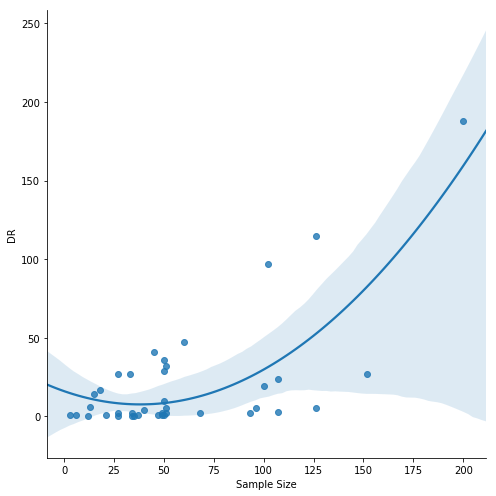

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plot a linear regression between 'weight' and 'hp'

sns.lmplot(x='Sample Size',y='DR' ,data=df,size=7,markers='o',order=2)


#sns.regplot(x='Year', y='DR', data=df, color='blue', scatter=None,label='order 1')
# Display the plot
plt.show()